In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load mpg dataset and prepare for classification

In [13]:
df = sns.load_dataset('mpg')
df['us_car'] = df.origin=='usa'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,us_car
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,True
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,True
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,True
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,True
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,True


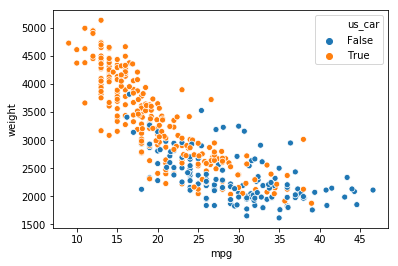

In [15]:
sns.scatterplot(data=df, x='mpg', y='weight', hue='us_car'); plt.show()

In [189]:
#X = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
X = df[['mpg', 'weight']]
y = df['us_car']

# Create Pipeline, perform Train-Test-Split, Visualize Prediction

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [191]:
pipeline = make_pipeline(
    KNeighborsClassifier(n_neighbors=6)
)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.7625

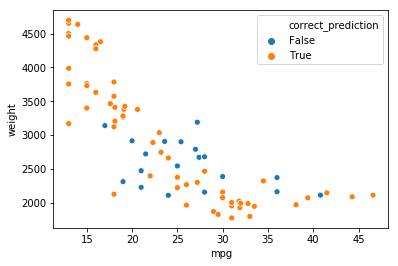

In [192]:
df_viz = pd.DataFrame(X_test).copy()
df_viz['us_car'] = y_test
df_viz['prediction'] = pipeline.predict(X_test)
df_viz['correct_prediction'] = (df_viz.us_car & df_viz.prediction) | (~df_viz.us_car & ~df_viz.prediction)
sns.scatterplot(data=df_viz, x='mpg', y='weight', hue='correct_prediction'); plt.show()

# Improve Scoring by Cross Validation

In [199]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=10)
print(scores)
print(scores.mean())

[0.825      0.8        0.875      0.675      0.8        0.7
 0.775      0.8        0.575      0.65789474]
0.7482894736842105


# Search for Optimal Parameter by Grid Search

In [195]:
pipeline

Pipeline(memory=None,
     steps=[('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform'))])

In [200]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
# the pipeline stage is followed by two underscores "__" and then the parameter to be varied is named (as key)
# the value is a list of parameter values to be searched
param_grid = [
  {'kneighborsclassifier__n_neighbors': range(1,20)}  
 ]

search = GridSearchCV(pipeline, param_grid, cv=5)
search.fit(X, y)
print("Best parameter (CV score={:.2f}):{})".format(search.best_score_, search.best_params_))

Best parameter (CV score=0.77):{'kneighborsclassifier__n_neighbors': 14})


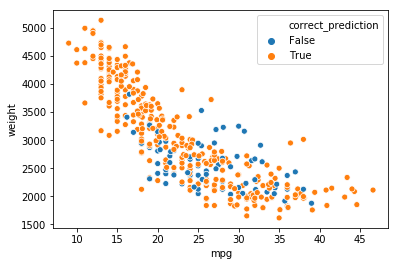

In [203]:
df_viz = pd.DataFrame(X).copy()
df_viz['us_car'] = y
df_viz['prediction'] = search.predict(X)
df_viz['correct_prediction'] = (df_viz.us_car & df_viz.prediction) | (~df_viz.us_car & ~df_viz.prediction)
sns.scatterplot(data=df_viz, x='mpg', y='weight', hue='correct_prediction'); plt.show()

# Add further features

In [204]:
X_all_features = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y_all_features = df['us_car']

In [209]:
pipeline_all_features = make_pipeline(
    SimpleImputer(),
    KNeighborsClassifier(n_neighbors=6)
)
search_all_features = GridSearchCV(pipeline_all_features, param_grid, cv=5)
search_all_features.fit(X_all_features, y_all_features)
print("Best parameter (CV score={:.2f}):{})".format(search_all_features.best_score_, search.best_params_))

Best parameter (CV score=0.81):{'kneighborsclassifier__n_neighbors': 14})


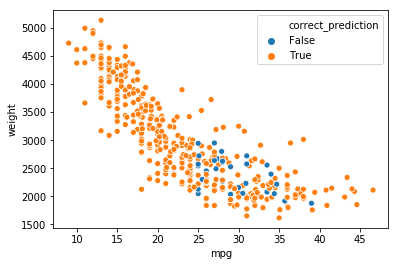

In [210]:
df_viz = pd.DataFrame(X_all_features).copy()
df_viz['us_car'] = y_all_features
df_viz['prediction'] = search_all_features.predict(X_all_features)
df_viz['correct_prediction'] = (df_viz.us_car & df_viz.prediction) | (~df_viz.us_car & ~df_viz.prediction)
sns.scatterplot(data=df_viz, x='mpg', y='weight', hue='correct_prediction'); plt.show()